# Stochastic Block Model (SBM)

In [1]:
import graspologic

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Unlike [Erdos-Renyi (ER) models](./erdos_renyi.ipynb), a Stochastic Block Model (SBM) produces graphs containing communities: disjoint subgraphs characterized by differing edge probabilities for vertices within and between communities [(1)](https://en.wikipedia.org/wiki/Stochastic_block_model).

SBM is parametrized by the number of vertices in each community $n$, and a block probability matrix $P \in \mathbb{R}^{n x n}$ where each element specifies the probability of an edge in a particular block. One can think of SBM as a collection of ER graphs where each block corresponds to an ER graph.

Below, we sample a two-block SBM (undirected, no self-loops) with following parameters:

\begin{align*}
n &= [50, 50]\\
P &= \begin{bmatrix} 
0.5 & 0.2\\
0.2 & 0.05
\end{bmatrix}
\end{align*}

The diagonals correspond to probability of an edge within blocks and the off-diagonals correspond to probability of an edge between blocks.

In [2]:
from graspologic.simulations import sbm

n = [50, 50]
p = [[0.5, 0.2],
     [0.2, 0.05]]

np.random.seed(1)
G = sbm(n=n, p=p)

## Visualize the graph using heatmap

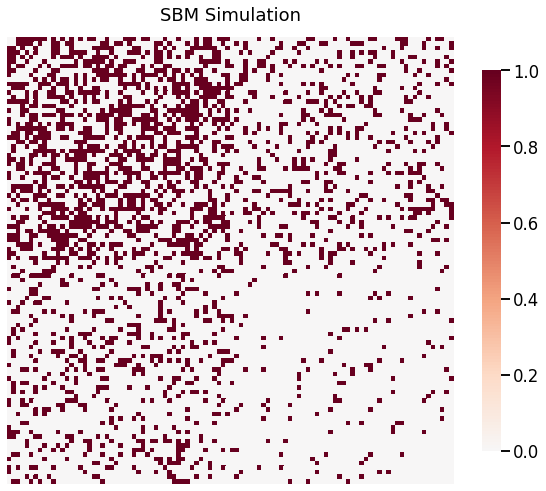

In [3]:
from graspologic.plot import heatmap

_ = heatmap(G, title ='SBM Simulation')

## Weighted SBM Graphs

Similar to ER simulations, ``sbm()`` functions provide ways to sample weights for all edges that were sampled via a probability distribution function. In order to sample with weights, you can either:

1. Provide a *single* probability distribution function with corresponding keyword arguments for the distribution function. All weights will be sampled using the same function.
2. Provide a probability distribution function with corresponding keyword arguments for each block.

Below we sample a SBM (undirected, no self-loops) with the following parameters:

\begin{align*}
n &= [50, 50]\\
P &= \begin{bmatrix}0.5 & 0.2\\
0.2 & 0.05
\end{bmatrix}
\end{align*}

and the weights are sampled from the following probability functions:

\begin{align*}
PDFs &= \begin{bmatrix}Normal & Poisson\\
Poisson & Normal
\end{bmatrix}\\
Parameters   &= \begin{bmatrix}{\mu=3, \sigma^2=1} & {\lambda=5}\\
{\lambda=5} & {\mu=3, \sigma^2=1}
\end{bmatrix}
\end{align*}

In [4]:
from numpy.random import normal, poisson

n = [50, 50]
p = [[0.5, 0.2],
     [0.2, 0.05]]
wt = [[normal, poisson],
      [poisson, normal]]
wtargs = [[dict(loc=3, scale=1), dict(lam=5)],
          [dict(lam=5), dict(loc=3, scale=1)]]

G = sbm(n=n, p=p, wt=wt, wtargs=wtargs)

## Visualize the graph using heatmap

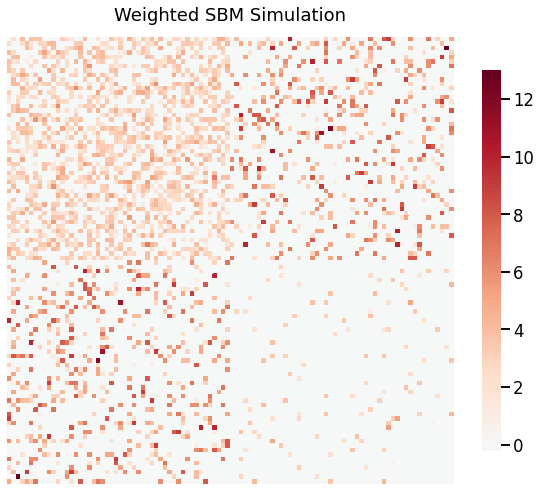

In [5]:
_ = heatmap(G, title='Weighted SBM Simulation')